In [35]:
import os
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np

rootdir = './test/'           

# Auxiliar functions

In [104]:
def checkJson(json, name=None, initial_lr=None, dropout=None, l2_reg=None, batch_norm=None, data_aug=None):
    if name is not None and json["name_model"]!=name:
        return False
    if initial_lr is not None and json["initial_lr"]!=initial_lr:
        return False
    if dropout is not None and json["dropout"]!=dropout:
        return False
    if l2_reg is not None and json["l2_reg"]!=name:
        return False
    if batch_norm is not None and json["batch_norm"]!=name:
        return False
    if data_aug is not None and json["data_aug"]!=data_aug:
        return False
    return True
    
def confidenceInterval(accuracy, n_test):
    return 1.96*np.sqrt(accuracy*(100-accuracy)/n_test)

# MLP graphs

## No regularization

In [105]:
header = "Learning Rate & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["initial_lr"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"

                
print(header[0:-1])
print(row2[0:-1])
print(row4[0:-1])
print(row8[0:-1])

Learning Rate & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ & $0.001$ & $0.002$ & $0.005$ & $0.010$ &
2 Hidden Layers & $44.86\pm0.97$ &$47.96\pm0.98$ &$51.16\pm0.98$ &$55.11\pm0.97$ 
4 Hidden Layers & $47.00\pm0.98$ &$49.85\pm0.98$ &$52.63\pm0.98$ &$56.40\pm0.97$ 
8 Hidden Layers & $45.97\pm0.98$ &$50.88\pm0.98$ &$54.22\pm0.98$ &$56.40\pm0.97$ 


In [109]:
header = "L2 regularization $\lambda$ & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers-reg"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
    
                
print(header[0:-1])
print(row2[0:-1]+ " \\")
print(row4[0:-1]+ " \\")
print(row8[0:-1]+ " \\")

L2 regularization $\lambda$ &
2 Hidden Layers & $53.38\pm0.98$ &$52.54\pm0.98$ &$50.61\pm0.98$ &$45.58\pm0.98$  \
4 Hidden Layers & $55.24\pm0.97$ &$52.47\pm0.98$ &$46.17\pm0.98$ &$40.25\pm0.96$  \
8 Hidden Layers & $56.82\pm0.97$ &$56.10\pm0.97$ &$49.78\pm0.98$ &$39.02\pm0.96$  \


In [122]:
header = "Dropout & "
row2 = "2 Hidden Layers & "
row4 = "4 Hidden Layers & "
row8 = "8 Hidden Layers & "

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="MLP-2layers-dropout"):
                header += "$"+str('{:.3f}'.format(data["parameters"]["dropout"])) + "$ & "
                row2+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-4layers-dropout"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row4+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
            if checkJson(data["parameters"], name="MLP-8layers-dropout"):
                # header += "$"+str('{:.3f}'.format(data["parameters"]["l2_reg"])) + "$ & "
                row8+= "$"+str('{:.2f}'.format(data["test_accuracy"]*100))+"\pm"+str('{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))) + "$ &"
    
                
print(header[0:-1])
print(row2[0:-1]+ " \\")
print(row4[0:-1]+ " \\")
print(row8[0:-1]+ " \\")

Dropout & $0.100$ & $0.250$ & $0.500$ &
2 Hidden Layers & $53.85\pm0.98$ &$55.48\pm0.97$ &$54.45\pm0.98$  \
4 Hidden Layers & $54.24\pm0.98$ &$56.44\pm0.97$ &$50.96\pm0.98$  \
8 Hidden Layers & $54.95\pm0.98$ &$45.16\pm0.98$ &$19.44\pm0.78$  \


## Regularization

In [196]:
datas = [[None for _ in range(3)] for _ in range(10)]

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            
            if dir == "08_20_57_07":
                continue
            
            i,j = -1,-1
            
            if "2" in data["parameters"]["name_model"]:
                i = 0
            elif "4" in data["parameters"]["name_model"]:
                i = 1
            elif "8" in data["parameters"]["name_model"]:
                i = 2
            
            if data["parameters"]["batch_norm"] and data["parameters"]["dropout"]>0:
                j = 9
            elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]>0:
                if data["parameters"]["l2_reg"]==0.001:
                    j = 0
                elif data["parameters"]["l2_reg"]==0.002:
                    j = 1
                elif data["parameters"]["l2_reg"]==0.005:
                    j = 2
                elif data["parameters"]["l2_reg"]==0.010:
                    j = 3
            elif data["parameters"]["dropout"]>0:
                if data["parameters"]["dropout"]==0.10:
                    j = 4
                elif data["parameters"]["dropout"]==0.25:
                    j = 5
                elif data["parameters"]["dropout"]==0.50:
                    j = 6
            elif data["parameters"]["batch_norm"]:
                j = 7
            elif data["parameters"]["data_aug"]:
                j = 8
                           
            #print(dir, i, j)
            acc = '{:.2f}'.format(data["test_accuracy"]*100)
            ci = '{:.2f}'.format(confidenceInterval(data["test_accuracy"]*100, 10_000))
                
            if i!=-1 and j!=-1:
                datas[j][i]={"acc":acc, "ci":ci}
    
for row in datas:
    r = ""
    for col in row:
        #print(row,col)
        if col is not None:
            r += "$"+col["acc"]+"\pm"+col["ci"]+ "$ &"
    print(r[0:-1]+ "\\\\")
                


$53.38\pm0.98$ &$55.24\pm0.97$ &$56.82\pm0.97$ \\
$52.54\pm0.98$ &$52.47\pm0.98$ &$56.10\pm0.97$ \\
$50.61\pm0.98$ &$46.17\pm0.98$ &$49.78\pm0.98$ \\
$45.58\pm0.98$ &$40.25\pm0.96$ &$39.02\pm0.96$ \\
$53.85\pm0.98$ &$54.24\pm0.98$ &$54.95\pm0.98$ \\
$55.48\pm0.97$ &$56.44\pm0.97$ &$45.16\pm0.98$ \\
$54.45\pm0.98$ &$50.96\pm0.98$ &$19.44\pm0.78$ \\
$53.20\pm0.98$ &$51.28\pm0.98$ &$48.48\pm0.98$ \\
$50.14\pm0.98$ &$53.93\pm0.98$ &$54.16\pm0.98$ \\
$53.98\pm0.98$ &$55.87\pm0.97$ &$54.71\pm0.98$ \\


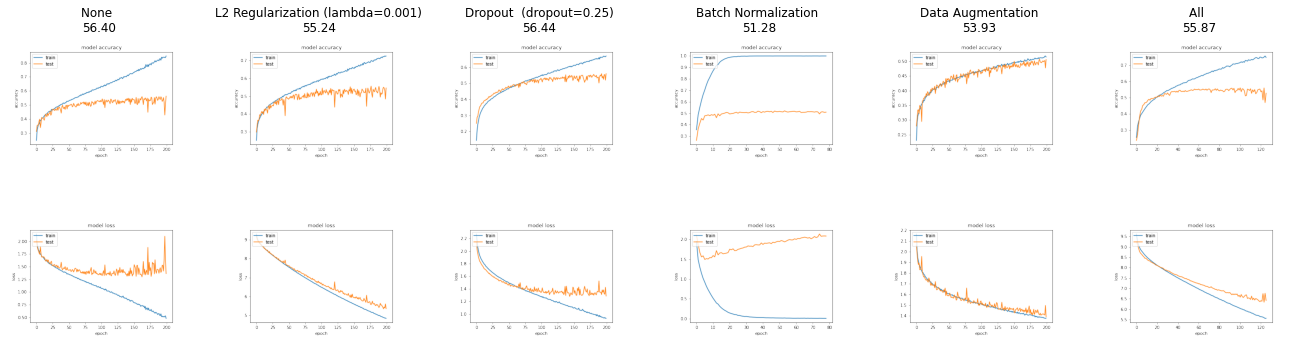

In [195]:
fig, axs = plt.subplots(2,6,figsize=(23,6))
for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if "4" in data["parameters"]["name_model"]:
                
                if data["parameters"]["batch_norm"] and data["parameters"]["dropout"]>0:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,5].set_title("All \n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    axs[0,5].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,5].imshow(img)
                elif "l2_reg" in data["parameters"].keys() and data["parameters"]["l2_reg"]==0.001:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,1].imshow(img)
                    axs[0,1].set_title("L2 Regularization (lambda=0.001)\n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,1].imshow(img)
                elif data["parameters"]["dropout"]==0.25:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,2].set_title("Dropout  (dropout=0.25)\n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    axs[0,2].imshow(img)
                    
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,2].imshow(img)
        
                elif data["parameters"]["batch_norm"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,3].set_title("Batch Normalization \n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    axs[0,3].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,3].imshow(img)
                elif data["parameters"]["data_aug"]:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,4].set_title("Data Augmentation\n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    axs[0,4].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,4].imshow(img)
                elif data["parameters"]["name_model"]=="MLP-4layers" and data["parameters"]["initial_lr"]==0.01:
                    img = mpimg.imread(rootdir+dir+"/accuracy.png")
                    axs[0,0].set_title("None \n"+'{:.2f}'.format(data["test_accuracy"]*100))
                    axs[0,0].imshow(img)
                    
                    img = mpimg.imread(rootdir+dir+"/loss.png")
                    axs[1,0].imshow(img)